# Michael Dorio, Eric Micara, Jeremy Rosen, Ethan Floumanhaft

# Introduction

We are data analysts part of a private company that was hired by the NCAA chair of education. Our overall goal is to gain a better understanding of how NCAA college athletes are performing in the classroom.

The data set we used is https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv

The NCAA was concerned about whether the student athletes were keeping up academically while playing their respective sports. The NCAA’s research team developed a “reform package” to determine if the student athletes are keeping up using the metric they call “APR”.

Our remaining columns are; “SCL_NAME”, “SPORT_NAME”, “SCL_DIV_19”, “SCL_PRIVATE”, "SCL_HBCU" and the APR (out of 1000). The first column is the name of the school. The second column is the name of the sport. The third column determines which division the school is in. The fourth column determines whether the school is private or public. The fifth column measures if the college is historically black or not. The sixth column (and final column) determines the APR, which is the score of how the athletes are performing in the classroom. “SPORT_NAME”, “SCL_DIV_19” and “SCL_PRIVATE” are all categorical columns while “SCL_NAME” is text and “APR” is numeric.


#Research Questions

1). There is major skepticism about some college sports that they take up too much of the students time and negatively affects the most important part of being a student: being a student. We believe that there is some truth to this belief. We will try and show this by comparing the sports that student athletes play and their APR scores and we believe that it will show that some sports, that take more time away from being a student and that bring in the school a lot more money, will have a much lower average APR score than others, due to the schools being more lenient for them.

2) Although the trends we might see from all the schools may show specific results there are reasons that different schools value some sports more than others. Meaning that it might be possible that the APR would increase money for a school that puts more effort into their sport. SInce Alabama is a major football school we would assume that people in Alabama's football program would have a higher APR than people in Alabama's Field Hockey program. Villanova University's basketball team has a lot more money put into the program - we would expect a higher APR from their basketball program. Do the trends of APR depending on sport differ from school to school?

3). Historically, schools that are known to be historically black have or had struggles with obtaining resources for funding projects and programs.  We will use a logistic regression to determine if there is a potential association between a college being historically black and a student athlete's APR score to the extent that we would expect.

4). There is an expectation amongst private schools that they have a much higher standard for student athletes. This would cause us to expect for the students in private schools to have a higher APR score. In order to check whether or not this is the case, we will use a logistic regression to test and see if there is a statistically significant difference between public and private schools when it comes to student athlete APR.

# Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [ ]:
ncaa = pd.read_csv("https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv")
ncaa.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,...,PUB_AWARD_15,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06
0,NaN,100654,Alabama A&M University,1,Baseball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100654,Alabama A&M University,4,Football,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
ncaa.isnull().sum()

,0
DATA_TAB_GENERALINFO,6017
SCL_UNITID,0
SCL_NAME,0
SPORT_CODE,0
SPORT_NAME,0
...,...
PUB_AWARD_10,5244
PUB_AWARD_09,5315
PUB_AWARD_08,5364
PUB_AWARD_07,5250


In [ ]:
ncaa1 = ncaa[["SCL_NAME",'SPORT_NAME', "SCL_DIV_19", "SCL_PRIVATE", "SCL_HBCU", "MULTIYR_APR_RATE_1000_OFFICIAL"]]
ncaa1.head(40)

,SCL_NAME,SPORT_NAME,SCL_DIV_19,SCL_PRIVATE,SCL_HBCU,MULTIYR_APR_RATE_1000_OFFICIAL
0,Alabama A&M University,Baseball,1,N,Y,923.0
1,Alabama A&M University,Men's Basketball,1,N,Y,908.0
2,Alabama A&M University,Football,1,N,Y,924.0
3,Alabama A&M University,Men's Golf,1,N,Y,946.0
4,Alabama A&M University,Men's Tennis,1,N,Y,1000.0
5,Alabama A&M University,"Men's Track, Cross Country",1,N,Y,866.0
6,Alabama A&M University,Women's Basketball,1,N,Y,934.0
7,Alabama A&M University,Women's Bowling,1,N,Y,1000.0
8,Alabama A&M University,Women's Cross Country,1,N,Y,942.0
9,Alabama A&M University,Women's Softball,1,N,Y,985.0


In [ ]:
ncaa1 = ncaa1.dropna()
ncaa1.isna().sum()

,0
SCL_NAME,0
SPORT_NAME,0
SCL_DIV_19,0
SCL_PRIVATE,0
SCL_HBCU,0
MULTIYR_APR_RATE_1000_OFFICIAL,0


In [ ]:
ncaa1.head(10)

,SCL_NAME,SPORT_NAME,SCL_DIV_19,SCL_PRIVATE,SCL_HBCU,MULTIYR_APR_RATE_1000_OFFICIAL
0,Alabama A&M University,Baseball,1,N,Y,923.0
1,Alabama A&M University,Men's Basketball,1,N,Y,908.0
2,Alabama A&M University,Football,1,N,Y,924.0
3,Alabama A&M University,Men's Golf,1,N,Y,946.0
4,Alabama A&M University,Men's Tennis,1,N,Y,1000.0
5,Alabama A&M University,"Men's Track, Cross Country",1,N,Y,866.0
6,Alabama A&M University,Women's Basketball,1,N,Y,934.0
7,Alabama A&M University,Women's Bowling,1,N,Y,1000.0
8,Alabama A&M University,Women's Cross Country,1,N,Y,942.0
9,Alabama A&M University,Women's Softball,1,N,Y,985.0


We dropped the NA values in the rows that did not have all the information because it wouldn't be good if we were using data for one model and not the other models. In other words, dropping rows that contain NA values ensures consistency throughout our data.

#Question 1: Comparing APR Between Sports


In [ ]:
#Make a dataframe

top_sports = ncaa1["SPORT_NAME"].value_counts().head(14).index
ncaa2 = ncaa1[ncaa1["SPORT_NAME"].isin(top_sports)]
ncaa3 = ncaa2.sort_values(by = "MULTIYR_APR_RATE_1000_OFFICIAL", ascending = True)
ncaa3.drop(index=5249, inplace=True)
ncaa3.drop(index=5, inplace=True)

In [ ]:
ncaa3

,SCL_NAME,SPORT_NAME,SCL_DIV_19,SCL_PRIVATE,SCL_HBCU,MULTIYR_APR_RATE_1000_OFFICIAL
5251,Stephen F. Austin State University,Football,1,N,N,894.0
978,Delaware State University,Men's Basketball,1,N,Y,901.0
2143,"Southern University, Baton Rouge","Men's Track, Cross Country",1,N,Y,903.0
2141,"Southern University, Baton Rouge",Men's Cross Country,1,N,Y,906.0
2197,Coppin State University,Men's Basketball,1,N,Y,906.0
...,...,...,...,...,...,...
71,Auburn University,Men's Golf,1,N,N,1000.0
66,University of Alabama,Women's Volleyball,1,N,N,1000.0
59,University of Alabama,Women's Golf,1,N,N,1000.0
6016,Kennesaw State University,Women's Volleyball,1,N,N,1000.0


<ipython-input-41-7df99e5fd737>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ncaa3, x = "SPORT_NAME", y = "MULTIYR_APR_RATE_1000_OFFICIAL", palette = "rainbow")


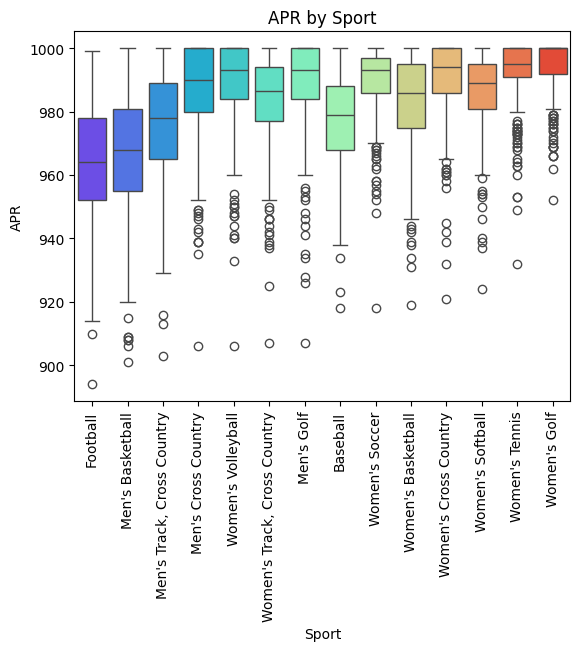

In [ ]:
#Making a box plot to display the difference the sport makes
sns.boxplot(ncaa3, x = "SPORT_NAME", y = "MULTIYR_APR_RATE_1000_OFFICIAL", palette = "rainbow")

figsize = (400,10)
plt.xticks(rotation=90)
plt.title("APR by Sport")
plt.xlabel("Sport")
plt.ylabel("APR")
plt.show()



It should be noted that two extreme outliers were removed, one was in Men's basketball, and the other was in Men's track and cross country. Only the top 14 sports in terms of the amount of schools that have a team were included.  

One topic that often comes up for discussion is the differences between women's and men's sports. If our hypothesis is consistent, then we should see a much higher APR score for the women's sports, since the colleges will be more lenient to the men's sports.

In [ ]:
#Create a new column for gender
ncaa3["GENDER"] = ncaa3["SPORT_NAME"].isin(["Football", "Men's Basketball", "Men's Track, Cross Country", "Men's Cross Country", "Men's Golf", "Baseball"])
ncaa3.loc[ncaa3["GENDER"]==True,"GENDER"] = "Men"
ncaa3.loc[ncaa3["GENDER"]==False,"GENDER"] = "Women"


<ipython-input-42-462c70614e2e>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Men' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  ncaa3.loc[ncaa3["GENDER"]==True,"GENDER"] = "Men"


In [ ]:
#sort the average APR by gender
average_apr = ncaa3.groupby("SPORT_NAME")["MULTIYR_APR_RATE_1000_OFFICIAL"].mean().reset_index()
average_apr["GENDER"] = average_apr["SPORT_NAME"].isin(["Football", "Men's Basketball", "Men's Track, Cross Country", "Men's Cross Country", "Men's Golf", "Baseball"])
average_apr.loc[average_apr["GENDER"]==True,"GENDER"] = "Men"
average_apr.loc[average_apr["GENDER"]==False,"GENDER"] = "Women"


<ipython-input-43-8e29e0598fec>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Men' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  average_apr.loc[average_apr["GENDER"]==True,"GENDER"] = "Men"


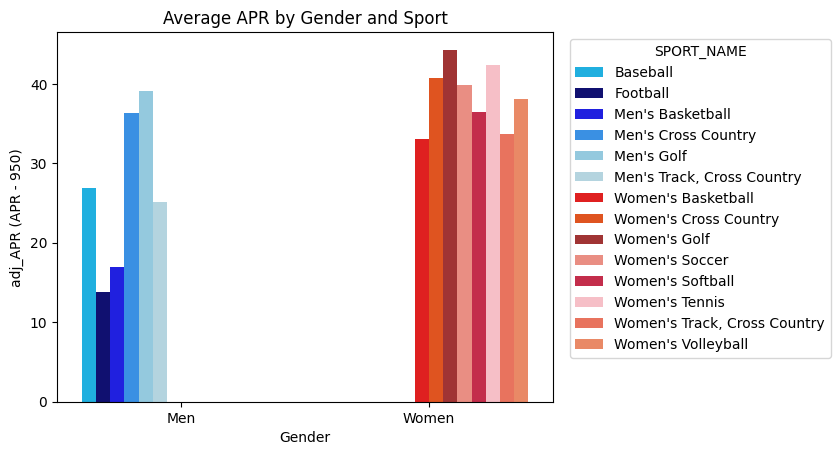

In [ ]:
#Make a barplot to show the difference gender makes in APR
average_apr["adj_APR"] =  average_apr["MULTIYR_APR_RATE_1000_OFFICIAL"] - 950
average_apr

palette = {
    "Football": "navy",
    "Men's Basketball": "blue",
    "Men's Track, Cross Country": "lightblue",
    "Men's Cross Country": "dodgerblue",
    "Men's Golf": "skyblue",
    "Baseball": "deepskyblue",
    "Volleyball": "lightcoral",
    "Women's Basketball": "red",
    "Softball": "darkred",
    "Women's Soccer": "salmon",
    "Women's Track, Cross Country": "tomato",
    "Women's Golf": "firebrick",
    "Women's Tennis": "lightpink",
    "Women's Volleyball": "coral",
    "Women's Softball": "crimson",
    "Women's Cross Country": "orangered"
}

sns.barplot(data=average_apr,x="GENDER",y="adj_APR",hue="SPORT_NAME",palette=palette,width=0.8)


plt.title("Average APR by Gender and Sport")
plt.xlabel("Gender")
plt.ylabel("adj_APR (APR - 950)")


plt.legend(title="SPORT_NAME", bbox_to_anchor=(1.02, 1))
plt.show()


In [ ]:
#Determine the average APR amoung all the men's and women's sports (that we have significant data for)
average_apr.groupby("GENDER")["adj_APR"].mean()

,adj_APR
GENDER,
Men,26.359454
Women,38.561001


This means that the average student athlete in men's sports is around 12 points lower than the Average APR in women's sports

Overall, this helps provide evidence to prove our hypothesis that sports that are more time-consuming and most watched, such as men's basketball and football, are the sports that have the lowest APR on average. As we claimed in our prediction, we believe this is due to a lack of time for the students and more leniency from the schools, since they are the most popular.

#Question 2: Check if Schools Are Favoring Sports

In [ ]:
# We are making a dataframe with only Villanova University
ncaa_villanova = ncaa2[ncaa2["SCL_NAME"] == "Villanova University"]


<ipython-input-47-72037f34c7a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_villanova["adj_APR"] =  ncaa_villanova["MULTIYR_APR_RATE_1000_OFFICIAL"] - 950 # makes the barplot look nicer
<ipython-input-47-72037f34c7a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ncaa_villanova, x = "SPORT_NAME", y = "adj_APR", palette = "rainbow")


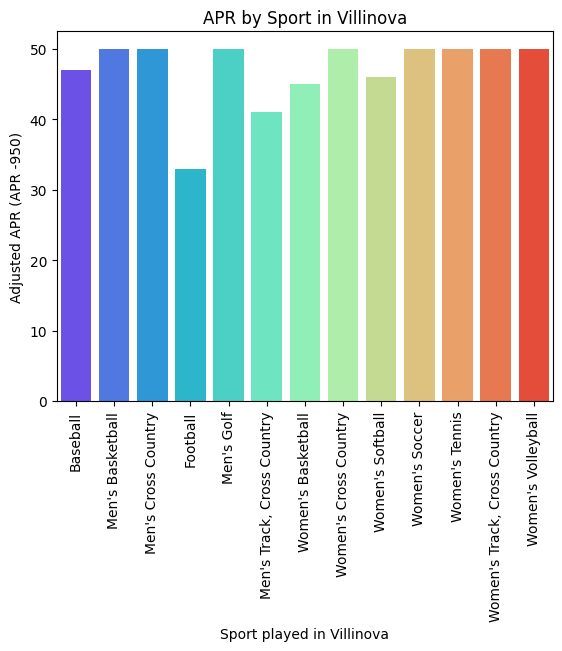

In [ ]:
#Makes a barplot showing the difference in APR in different sports for Villanova
ncaa_villanova["adj_APR"] =  ncaa_villanova["MULTIYR_APR_RATE_1000_OFFICIAL"] - 950 # makes the barplot look nicer

sns.barplot(ncaa_villanova, x = "SPORT_NAME", y = "adj_APR", palette = "rainbow")

figsize = (400,10)
plt.xticks(rotation=90)
plt.title("APR by Sport in Villinova")
plt.xlabel("Sport played in Villinova")
plt.ylabel("Adjusted APR (APR -950)")
plt.show()

Since Vilanova is a school with a more prestigious basketball program, despite national statistics, men's basketball generally has lower APR scores.

<ipython-input-48-652f9139a49e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_Alabama["adj_APR"] =  ncaa_Alabama["MULTIYR_APR_RATE_1000_OFFICIAL"] - 950
<ipython-input-48-652f9139a49e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ncaa_Alabama, x = "SPORT_NAME", y = "adj_APR", palette = "rainbow")


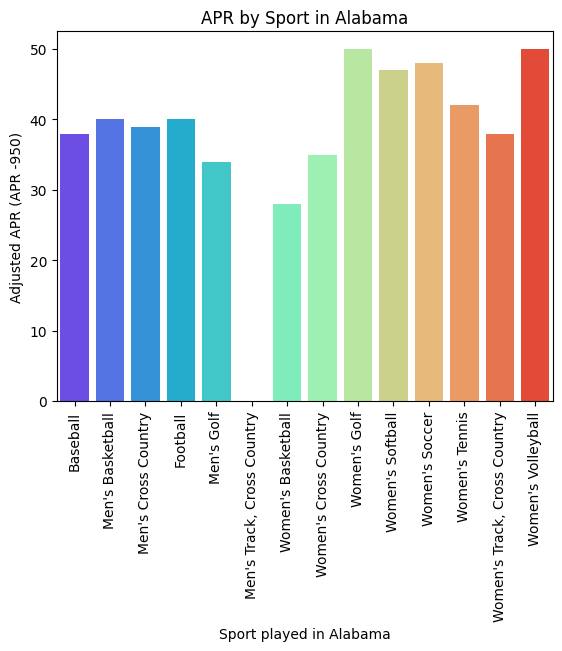

In [ ]:
#Now we are doing the same thing with Alabama to see if there is a trend
ncaa_Alabama = ncaa2[ncaa2["SCL_NAME"] == "University of Alabama"]
ncaa_Alabama["adj_APR"] =  ncaa_Alabama["MULTIYR_APR_RATE_1000_OFFICIAL"] - 950
sns.barplot(ncaa_Alabama, x = "SPORT_NAME", y = "adj_APR", palette = "rainbow")

figsize = (400,10)
plt.xticks(rotation=90)
plt.title("APR by Sport in Alabama")
plt.xlabel("Sport played in Alabama")
plt.ylabel("Adjusted APR (APR -950)")
plt.show()

In [ ]:
#Showing what the national average is to compare
average_apr.groupby("SPORT_NAME")["adj_APR"].mean()


,adj_APR
SPORT_NAME,
Baseball,26.889262
Football,13.799213
Men's Basketball,16.917379
Men's Cross Country,36.339744
Men's Golf,39.036913
"Men's Track, Cross Country",25.174216
Women's Basketball,33.008571
Women's Cross Country,40.758621
Women's Golf,44.289474


As it is shown, the University of Alabama, which is known as a "football school", has a significantly higher student APR than the national average.

#Question 3: Is there a difference between Private and Public Schools?

In [ ]:
#Turning values into binary
ncaa1["private"] = (ncaa1["SCL_PRIVATE"] == "Y").astype(int)
ncaa1["hbcu"]    = (ncaa1["SCL_HBCU"]    == "Y").astype(int)

#Dropping columns
ncaa1 = ncaa1.dropna(subset=["private", "MULTIYR_APR_RATE_1000_OFFICIAL"])



#Setting X and y values
y = ncaa1["private"]
X = sm.add_constant(ncaa1[["MULTIYR_APR_RATE_1000_OFFICIAL", "hbcu"]])

#Creating Logistic Model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.632064
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                private   No. Observations:                 6002
Model:                          Logit   Df Residuals:                     5999
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 May 2025   Pseudo R-squ.:                 0.03343
Time:                        23:03:41   Log-Likelihood:                -3793.6
converged:                       True   LL-Null:                       -3924.8
Covariance Type:            nonrobust   LLR p-value:                 1.054e-57
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -26.4946      2.020    -13.113     

In [ ]:
(np.exp(0.0263-1))*100

np.float64(37.7683022488488)

The APR coefficient (0.0263) indicates that an increase in APR raises the odds of a school being private by approximately 37.8 percent.


Pseudo R-squared being 0.03343 means that the model only explains about 3.3% of the variation in a school being public or private. Even though the predictors are statistically significant, there is more that explains whether a school is private.

In [ ]:
#Columns for Matrix
cols = ["private", "MULTIYR_APR_RATE_1000_OFFICIAL", "hbcu"]

#Creating correlation matrix
corr_matrix = ncaa1[cols].corr()
corr_matrix.head()

,private,MULTIYR_APR_RATE_1000_OFFICIAL,hbcu
private,1.000000,0.187478,-0.106150
MULTIYR_APR_RATE_1000_OFFICIAL,0.187478,1.000000,-0.274101
hbcu,-0.106150,-0.274101,1.000000


The correlation between a school being private and a school having a higher APR is .187. This shows a weak positive correlation between a school being private and having a higher APR.



<Axes: >

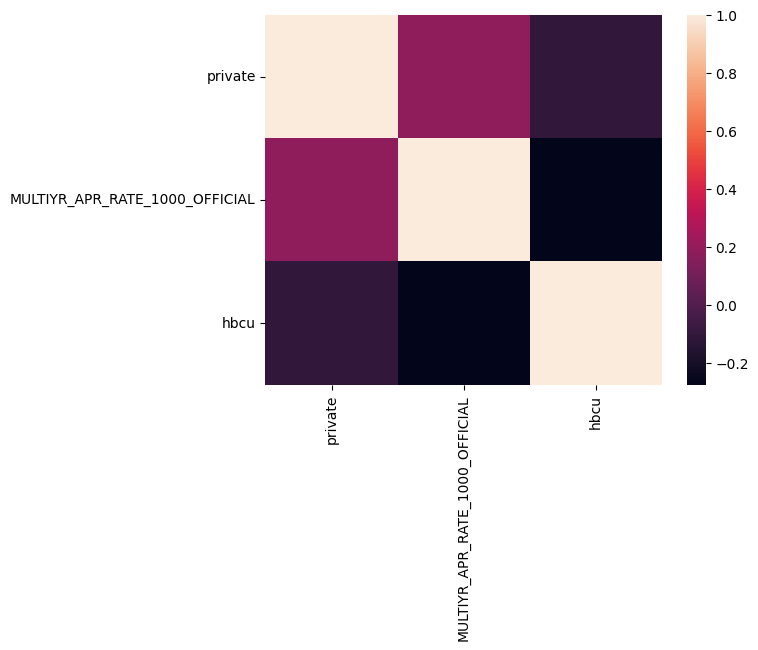

In [ ]:
#Creating heatmap for correlation matrix
sns.heatmap(corr_matrix)

In [ ]:
#Check to see if the private schools have a higher average APR
ncaa1.groupby("SCL_PRIVATE")["MULTIYR_APR_RATE_1000_OFFICIAL"].mean()

,MULTIYR_APR_RATE_1000_OFFICIAL
SCL_PRIVATE,
N,982.206726
Y,988.519391


This shows that private schools have a slightly higher average APR.

In [ ]:
#Predicting probabilities
phat = model.predict()
#Showing first 10 predicted probabilities
phat[0:10]

array([0.04618927, 0.03159313, 0.04736336, 0.08150598, 0.26892614,
       0.01067944, 0.06076482, 0.26892614, 0.07396014, 0.19859919])

In [ ]:
#2x2 prediction table
model.pred_table(threshold=0.5)

array([[3836.,    0.],
       [2166.,    0.]])

In [ ]:
#Storing confusion table
confusion = model.pred_table(threshold=0.5)
#Computing accuracy
confusion.trace()/confusion.sum()*100

np.float64(63.91202932355882)

In [ ]:
#Showing the percentage of private and public schools
y.value_counts(normalize=True)

,proportion
private,
0,0.63912
1,0.36088


This shows public schools are about 64% of the data meaning our model was not great (which makes sense because we barely had any variables).

#Question 4: Is There a Difference if it is an HBCU?

In [ ]:
ncaa1 = ncaa[["SCL_NAME", "SPORT_NAME", "SCL_DIV_19", "SCL_PRIVATE", "SCL_HBCU", "MULTIYR_APR_RATE_1000_OFFICIAL", "NUM_OF_ATHLETES_2016", "NUM_OF_ATHLETES_2017", "NUM_OF_ATHLETES_2018", "NUM_OF_ATHLETES_2019", "PUB_AWARD_16", "PUB_AWARD_17", "PUB_AWARD_18", "PUB_AWARD_19"]]
ncaa1 = ncaa1.dropna(subset=["SCL_HBCU", "MULTIYR_APR_RATE_1000_OFFICIAL", "SCL_PRIVATE", "NUM_OF_ATHLETES_2016", "NUM_OF_ATHLETES_2017", "NUM_OF_ATHLETES_2018", "NUM_OF_ATHLETES_2019", "PUB_AWARD_16", "PUB_AWARD_17", "PUB_AWARD_18", "PUB_AWARD_19"])
ncaa1.columns


# Making a dataframe with the columns I want to use for this regression and dropping their NAN values


Index(['SCL_NAME', 'SPORT_NAME', 'SCL_DIV_19', 'SCL_PRIVATE', 'SCL_HBCU',
       'MULTIYR_APR_RATE_1000_OFFICIAL', 'NUM_OF_ATHLETES_2016',
       'NUM_OF_ATHLETES_2017', 'NUM_OF_ATHLETES_2018', 'NUM_OF_ATHLETES_2019',
       'PUB_AWARD_16', 'PUB_AWARD_17', 'PUB_AWARD_18', 'PUB_AWARD_19'],
      dtype='object')

In [ ]:
X = ncaa1[["MULTIYR_APR_RATE_1000_OFFICIAL", "SCL_PRIVATE", "NUM_OF_ATHLETES_2016", "NUM_OF_ATHLETES_2017", "NUM_OF_ATHLETES_2018", "NUM_OF_ATHLETES_2019", "PUB_AWARD_16", "PUB_AWARD_17", "PUB_AWARD_18", "PUB_AWARD_19"]]
y = (ncaa1["SCL_HBCU"] == "Y").astype("float32") #setting X and Y to the chosen variables

In [ ]:
X = pd.get_dummies(X, drop_first=True).astype("float32")


In [ ]:
np.array(X) #pandas get dummies to make all values floats and np.array() to check if it actually worked

array([[ 994.,    9.,   11., ...,    0.,    1.,    0.],
       [1000.,    7.,    7., ...,    1.,    1.,    0.],
       [1000.,    9.,    8., ...,    1.,    1.,    0.],
       ...,
       [1000.,   13.,   13., ...,    1.,    1.,    0.],
       [1000.,    8.,    8., ...,    1.,    1.,    0.],
       [ 993.,    8.,    9., ...,    1.,    1.,    0.]], dtype=float32)

In [ ]:
ncaa1["private"] = (ncaa1["SCL_PRIVATE"] == "Y").astype("float32") #Making two new columns that keep HBCU and PRIVATE as floats, just like get dummies
ncaa1["hbcu"]    = (ncaa1["SCL_HBCU"]    == "Y").astype("float32")

In [ ]:
cols = ["private", "hbcu", "MULTIYR_APR_RATE_1000_OFFICIAL", "NUM_OF_ATHLETES_2016", "NUM_OF_ATHLETES_2017", "NUM_OF_ATHLETES_2018", "NUM_OF_ATHLETES_2019", "PUB_AWARD_16", "PUB_AWARD_17", "PUB_AWARD_18", "PUB_AWARD_19"]
corr_matrix = ncaa1[cols].corr() #creating a correlation matrix
corr_matrix.head()

,private,hbcu,MULTIYR_APR_RATE_1000_OFFICIAL,NUM_OF_ATHLETES_2016,NUM_OF_ATHLETES_2017,NUM_OF_ATHLETES_2018,NUM_OF_ATHLETES_2019,PUB_AWARD_16,PUB_AWARD_17,PUB_AWARD_18,PUB_AWARD_19
private,1.000000,-0.060080,0.205624,0.054918,0.067459,0.052562,0.056160,NaN,0.081743,0.107486,0.163268
hbcu,-0.060080,1.000000,-0.129014,-0.049957,-0.056646,-0.051101,-0.049596,NaN,-0.090107,-0.088854,-0.048498
MULTIYR_APR_RATE_1000_OFFICIAL,0.205624,-0.129014,1.000000,-0.119525,-0.120316,-0.129905,-0.129908,NaN,0.419613,0.550837,0.607638
NUM_OF_ATHLETES_2016,0.054918,-0.049957,-0.119525,1.000000,0.979766,0.959618,0.972847,NaN,-0.087313,-0.066249,-0.044269
NUM_OF_ATHLETES_2017,0.067459,-0.056646,-0.120316,0.979766,1.000000,0.958382,0.970451,NaN,-0.067914,-0.067631,-0.049578


##### This correlation matrix shows that HBCU and APR have a negative correlation which can be seen further in the heatmap below as its one of the darkest squares.


<Axes: >

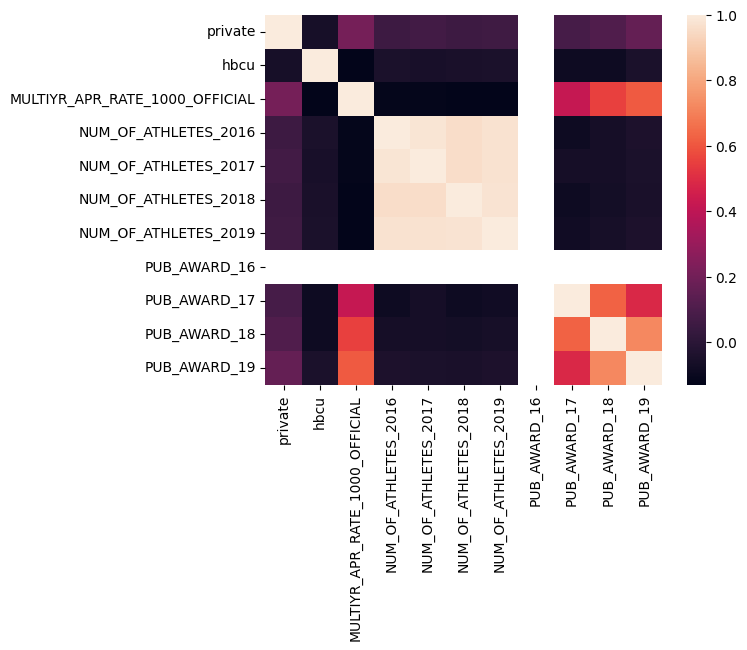

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
ncaa1.groupby("SCL_HBCU")["MULTIYR_APR_RATE_1000_OFFICIAL"].mean() #taking average APR of if colleges are historically black colleges or not

,MULTIYR_APR_RATE_1000_OFFICIAL
SCL_HBCU,
N,992.634298
Y,981.692308


In [ ]:
X = sm.tools.tools.add_constant(X)
model = sm.Logit(y, X).fit() #fitting a logistical regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.054019
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               SCL_HBCU   No. Observations:                  981
Model:                          Logit   Df Residuals:                      971
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 May 2025   Pseudo R-squ.:                  0.2333
Time:                        23:03:42   Log-Likelihood:                -52.993
converged:                       True   LL-Null:                       -69.121
Covariance Type:            nonrobust   LLR p-value:                 0.0001799
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
MULTIYR_APR_RATE_1000_OFFICIAL    -0.0585      0.027     -2.186    

##### This model predicts that the APR does not have a statistical significance in predicting if a college is historically black or not at the significance level 0.05. Say it were; the model would suggest that per unit APR goes up the log odds of the college being historically black changes by exp(0.0585)

In [ ]:
(np.exp(-0.0585)-1)*100 #Calculating the log odds of the APR coefficient


np.float64(-5.682175960033343)

##### Just by looking at the mean we can see a slight difference in APR for historically black schools and not historically black schools. This has no significant statistical evidence in itself though.


#Conclusion

##### Overall, for the first question of whether or not the sport makes a difference, the answer is that it does. It is clearly shown that some sports have significantly higher average APR scores than other sports. It is expressed even clearer when looking at the difference between men’s sports and women’s sports, where women's sports have way higher APR scores (12 points higher on average). This shows that female student athletes are doing better academically than male student athletes.

##### The second question, of whether student athletes do better academically when the school favors a sport, shows that this is the case. Villanova’s basketball programs' student athletes have an average adjusted APR than the national average by 34 and Alabama’s football team's APR is also much higher than the national average in football.

##### Our third question asks if private school student athletes are more likely to have a higher APR score. Based on our logistic regression model, it shows that this is true. The analysis was somewhat effective, although there are many other contributing factors that affect a schools APR score. This outcome aligns with our hypothesis that private schools, on average, maintain a much higher standard for student athletes.

##### After researching the 4th question as to whether or not a APR score will dictate whether or not a college is historically black or not, we can conclude that, though there are signs of slight correlation between the two, there is no statistically significant evidence between the two to suggest that APR plays a significant role in predicting if a college is historically black or not. After creating a correlation matrix and heatmap, it is evident to see that there is a slight negative correlation between a college being historically black or not and its APR score, but that has no statistical evidence in itself and cannot be used to draw a full conclusion. This idea is slightly reinforced by a pandas groupby method that shows that colleges that are not historically black have a higher average APR score across the dataset. We then fit a model with if a college is historically black or not as the y dependent variable and a couple variables for X, including the APR rate of a school in the past 4 years, the amount of players in the last 4 years, if the school has won a public recognition award in the past 4 years and if a school was private or not. The p value that is produced shows us that there is not enough evidence within the model to suggest that APR has a significant effect in if a college is historically black or not. This idea is also reinforced through the fact that our null accuracy is equal to the accuracy of the model, meaning that the model is just guessing based on the most popular choice. In conclusion, there is slight evidence to suggest that a slight correlation between the two exists but not enough of it is significant enough to make any meaningful conclusions.

##### We can improve this by adding more data to the dataset that would be useful for showing differences between groups in terms of APR, the biggest example would be something like location or more accurate data on the division as the dataset only has data for mostly Division I schools. More sophisticated approaches can be applied to further investigate a correlation in the dataset, such as transforming the predicate variables or the dependent variables in logistic regressions or using packages such as machine learning to make a better model compared to the logistical regression models.
